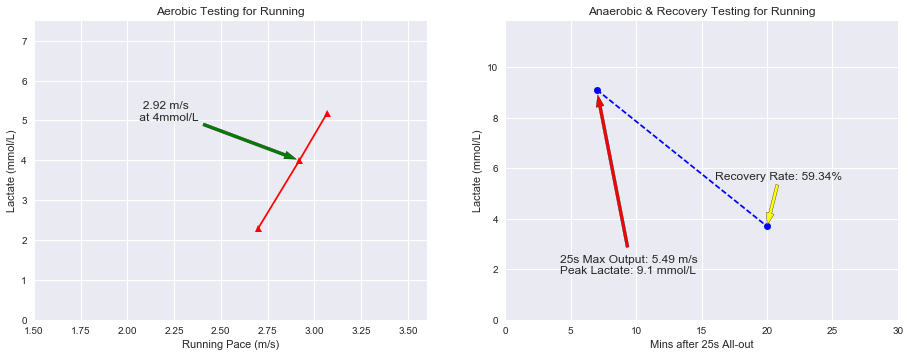

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from lactate_test import find_4mmol_output
from pace_convertion import pace_convertion
from get_lactate_from_excel import get_lactate_from_excel

lactate = get_lactate_from_excel('D:/test_dataframe.xlsx', 'run')

ae_intensity_list = [pace_convertion(i) for i in lactate[1]] 
ae_lactate_list = lactate[0]

peak_lact_min = lactate[4]
peak_lactate = lactate[3]
an_peak_intensity = lactate[2]
recovery_lact = lactate[5]

########################### Enter Testing Values Below ##########################

sport_type = "running"

# By this step you should get lactate below 4mmol/L and preferably above 2mmol/L
x1='06:10' # power reading
y1=2.3 # lactate reading
# By this step you should get lactate above 4mmol/L
x2='05:26' # power reading
y2=5.2 # lactate reading

an_x = peak_lact_min # enter the minute which the peak lactate was detected
an_y = peak_lactate # enter the peak lactate
an_output = an_peak_intensity # enter 25s peak power
rec_x = 20
rec_y = recovery_lact # enter the lactate by 20min

########################### Below for Aerobic Testing ############################
if sport_type.lower() == 'cycling':
    sport_type = 'Cycling'
    ae_xlable = 'Power Output (Watt)'
    unit = 'watt'
elif sport_type.lower() == 'running':
    sport_type = 'Running'
    ae_xlable = 'Running Pace (m/s)'
    unit = 'm/s'
    x1_orig = x1
    x2_orig = x2
    an_output_orig = an_output
    x1 = pace_convertion(x1)
    x2 = pace_convertion(x2)
    an_output = pace_convertion(an_output)
    

dataset = [float(x1), float(x2), float(y1), float(y2)]
lactate4 = find_4mmol_output(dataset) # Get the power output reading at 4mmol/L

#print(dataset)
#print(lactate4)

plt.subplot(1, 2, 1)
# Draw makers and line
plt.plot([x1, lactate4, x2], [y1, 4.0, y2], 'r^-')
# To pin point the 4mmol/L
plt.annotate('  '+str(lactate4) + ' ' + unit + '\n at 4mmol/L', 
             xy=(lactate4, 4.0), xytext=(lactate4*0.7, 5),
            arrowprops=dict(width=3, headwidth=8, facecolor='green', shrink=0.03),
            )

plt.axis([int(x2)*0.5, int(x2)*1.2, 0, int(y2)*1.5])
plt.title('Aerobic Testing for ' + sport_type)
plt.xlabel(ae_xlable)
plt.ylabel('Lactate (mmol/L)')
plt.grid(True)

########################### Below for Anaerobic Testing ###########################
rec_rate = round((an_y - rec_y) / an_y * 100, 2)

plt.subplot(1, 2, 2)
# Draw makers and line
plt.plot([an_x, rec_x], [an_y, rec_y], 'bo--')

plt.annotate('25s Max Output: '+str(an_output)+' '+unit+'\nPeak Lactate: ' + str(an_y) + ' mmol/L', 
             xy=(an_x, an_y), xytext=(an_x*0.6, an_y*0.2),
            arrowprops=dict(width=3, headwidth=8, facecolor='red', shrink=0.03),
            )
plt.annotate('Recovery Rate: '+str(rec_rate)+'%', xy=(20, rec_y), xytext=(20*0.8, rec_y*1.5),
            arrowprops=dict(width=3, headwidth=8, facecolor='yellow', shrink=0.03),
            )

plt.axis([0, 30, 0, an_y*1.3])
plt.title('Anaerobic & Recovery Testing for ' + sport_type)
plt.xlabel('Mins after 25s All-out')
plt.ylabel('Lactate (mmol/L)')
plt.grid(True)

plt.subplots_adjust(left=0, right=1.5, wspace=0.2, hspace=0.8)

plt.show()